<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# <center>Тема 7. Навчання без вчителя: метод головних компонент і кластеризація</center>

## План

1. [Вступ](#1.-Вступ)  
2. [Метод головних компонент (PCA)](#2.-Метод-головних-компонент-\(PCA\))
 - [Інтуїція, теорія і особливості застосування](#Інтуїція,-теорія-і-особливості-застосування)
 - [Приклади використання](#Приклади-використання)


3. Кластеризація
 - K-means
 - Affinity Propagation
 - Спектральна кластеризація
 - Агломеративна кластеризація
 - Метрики якості кластеризації


4. [Корисні ресурси](#4.-Корисні-ресурси)

## 1. Вступ

Дана тема присвячена методам навчання без вчителя (unsupervised learning), зокрема методу головних компонент (PCA — principal component analysis) і кластеризації. Ми з'ясуємо, навіщо знижувати розмірність в даних, як це робити і які є способи групування схожих спостережень в даних.

Основна відмінність методів навчання без вчителя від звичних класифікацій і регресій машинного навчання в тому, що розмітки для даних в цьому випадку немає. В наслідок цього виникають відразу кілька особливостей — по-перше це можливість використання набагато більших обсягів даних, оскільки їх не потрібно буде розмічати руками для навчання, а по-друге це неясність вимірювання якості методів, через відсутність таких же прямолінійних та інтуїтивно зрозумілих метрик, як в задачах навчання з учителем.

Однією з найбільш очевидних задач, які виникають в голові за відсутності явної розмітки, є задача зниження розмірності даних. З одного боку її можна розглядати як допомогу в візуалізації даних, для цього часто використовується метод t-SNE, який ми розглядали на лекції присвяченій візуальному аналізу даних. З іншого боку подібне зниження розмірності може прибрати зайві сильно скорельовані ознаки у спостережень і підготувати дані для подальшої обробки методом навчання з вчителем (наприклад, дерева рішень).

## 2. Метод головних компонент (PCA)

### Інтуїція, теорія і особливості застосування

Метод головних компонент (Principal Component Analysis) — один з найбільш інтуїтивно простих і часто використовуваних методів для зниження розмірності даних і проекції їх на ортогональний підпростір ознак.

<img align="right" src="../img/pca.png" width="400">

У зовсім загальному вигляді це можна представити як припущення про те, що всі наші спостереження швидше за все виглядають як деякий еліпсоїд в підпросторі нашого вихідного простору і наш новий базис в цьому просторі співпадає з осями цього еліпсоїда. Це припущення дозволяє нам одночасно позбутися від сильно скорельованих ознак, так як вектори базису простору, на який ми проектуємо, будуть ортогональними.

У загальному випадку розмірність цього еліпсоїда буде рівна розмірності вихідного простору, але наше припущення про те, що дані лежать в підпросторі меншої розмірності, дозволяє нам відкинути "зайвий" підпростір в новій проекції, а саме той підпростір, вздовж осей якого еліпсоїд буде найменш розтягнутий. Ми будемо це робити "жадібно", вибираючи по-черзі в якості нового елемента базису нашого нового підпростору послідовно вісь еліпсоїда з решти, вздовж якої дисперсія буде максимальною.

Розглянемо як це реалізується математично:

Щоб знизити розмірність наших даних з $d$ до $k, k \leq d$, нам потрібно вибрати топ-$k$ осей такого еліпсоїда, що відсортовані за спаданням дисперсії уздовж осей.

Почнемо з того, що порахуємо дисперсії і коваріації вихідних ознак. Це робиться просто за допомогою матриці коваріації. За означенням коваріації, для двох ознак $X_i$ і $X_j$ їх коваріація буде
$$\large cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j$$
де $\mu_i$ — математичне сподівання $i$-ої ознаки.
При цьому відзначимо, що коваріація симетрична і коваріація вектора з самим собою буде дорівнювати його дисперсії.

Таким чином матриця коваріації є симетричною матрицею, де на діагоналі лежать дисперсії відповідних ознак, а поза діагоналлю — коваріації відповідних пар ознак. У матричному вигляді, де $\mathbf{X}$ —  матриця спостережень, наша матриця коваріації буде виглядати наступним чином

$$\large \Sigma = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$$

Щоб освіжити пам'ять — у матриць як у лінійних операторів є така цікава властивість як власні значення і власні вектори (eigenvalues і eigenvectors). Коли ми нашою матрицею діємо на відповідний лінійний простір, власні вектори залишаються на місці і лише множаться на відповідні їм власні значення. Тобто визначають підпростір, який при дії цією матрицею як лінійним оператором, залишається на місці або "переходить в себе". Формально власний вектор $w_i$ з власним значенням $\lambda_i$ для матриці $M$ визначається просто як $\large M w_i = \lambda_i w_i$.

Матрицю коваріації для центрованої вибірки $\mathbf{X}$ можна представити у вигляді добутку $\large \mathbf{X}^{T} \mathbf{X}$. Зі [співвідношення Релея](https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F) випливає, що максимальна варіація нашого набору даних буде досягатися вздовж власного вектора цієї матриці, що відповідає максимальному власному значенню. Таким чином головні компоненти, на які ми б хотіли спроектувати наші дані, є просто власними векторами відповідних топ-$k$ штук власних значень цієї матриці.

Один з найбільш ефективних способів знаходження власних векторів матриці $\Sigma$ — використання сингулярного розкладу (SVD) вихідної матриці $X$:

$$\Large X = UDV^T,$$

де $U \in R^{\ell \times \ell}$, $V \in R^{d \times d}$ — ортогональні матриці, а $D \in R^{\ell \times d}$ — діагональна матриця.

<details>
<summary><h3 style="display:inline;">Сингулярний розклад</h3></summary>
<p>

Розглянемо більш детально задачу про сингулярний розклад матриці $X \in \mathbb{R}^{\ell \times d}$. *Сингулярним розкладом* матриці $X$ називається представлення її у вигляді $X = UDV^T$, де:

 - $D$ є $\ell\times d$ матриця у якої елементи, що лежать на головній діагоналі, невід'ємні, а всі інші елементи дорівнюють нулю.
 - $U$ і $V$ – ортогональні матриці порядку $\ell$ і $d$ відповідно.
 
Елементи головної діагоналі матриці $D$ називаються *сингулярними числами* матриці $X$, а стовпці $U$ і $V$ лівими і правими *сингулярними векторами* матриці $X$.

Зауважимо, що матриці $XX^T$ і $X^TX$ є симетричними невід'ємно визначеними матрицями, і тому ортогональним перетворенням можуть бути приведені до діагонального вигляду, причому на діагоналі будуть стояти невід'ємні власні значення цих матриць.

В силу зазначених вище властивостей матриць $X^TX$ і $XX^T$ сингулярний розклад матриці $X$ тісно пов'язаний із задачею про спектральний розклад цих матриць. Більш точно:
- Ліві сингулярні вектори матриці $X$ – це власні вектори матриці $XX^T$.
- Праві сингулярні вектори матриці $X$ – це власні вектори матриці $X^TX$.
- Сингулярні числа матриці $X$ – це корені з власних значень матриці $X^TX$ (або $XX^T$).
</p>
</details>

### Алгоритм PCA
1. Визначити $k<d$ – нову розмірність
2. Провести стандартизацію даних (Standard Scaling)
3. Знайти сингулярний розклад матриці $X$:
$$\Large X = UDV^T$$
5. Покласти $V =$ [$k$ лівих стовпців матриці $V$]
6. Повернути нову матрицю $$\Large Z = XV \in \mathbb{R}^{\ell \times k}$$

### Приклади використання

### Візуалізація багатовимірних даних
Одним із застосувань методу головних компонент є візуалізації багатовимірних даних в двомірному (або тривимірному) просторі. Для цього необхідно взяти перші дві головних компоненти і спроектувати дані на них. При цьому, якщо ознаки мають різну природу, їх слід відмасштабувати.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.decomposition import PCA

#### Приклад з набором даних Iris

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


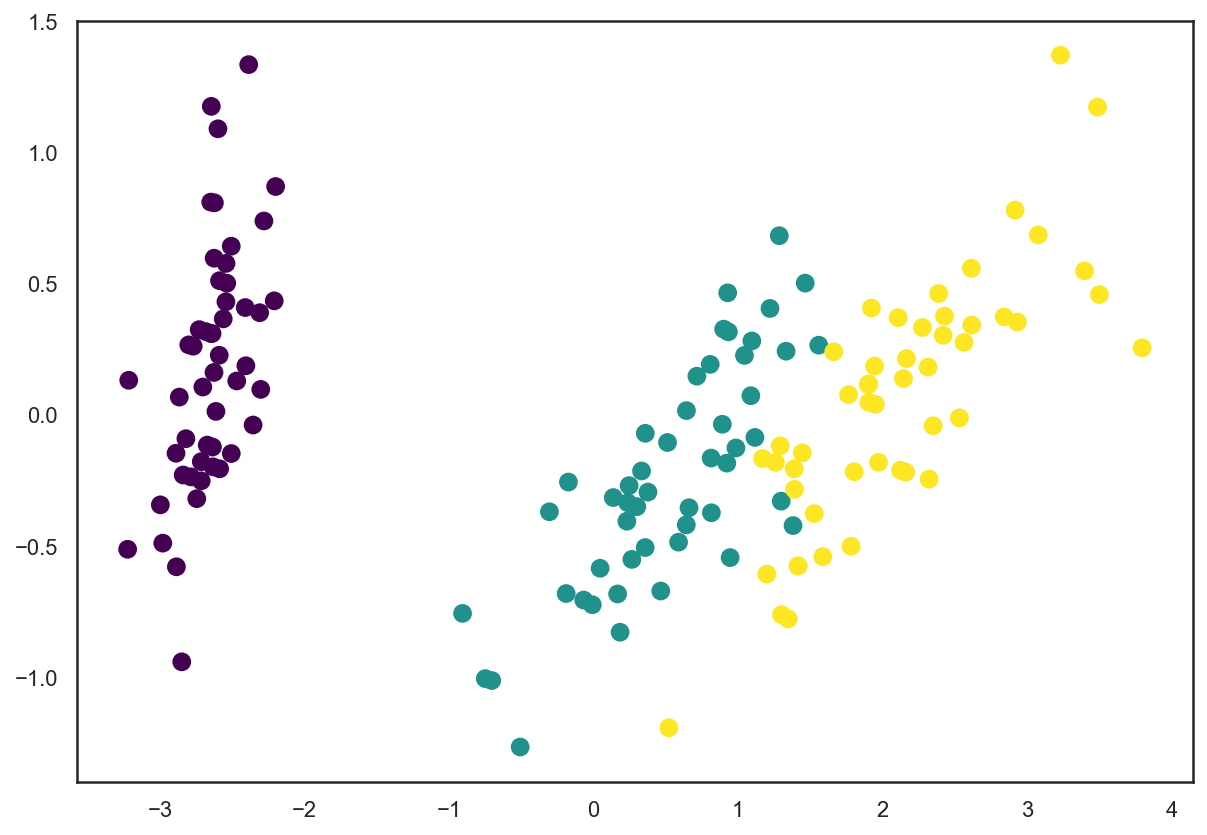

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

#### Приклад з набором даних digits

Розглянемо застосування методу головних компонент для візуалізації даних з набору зображень рукописних цифр. Ми з ним вже працювали на лекції присвяченій деревам рішень і методу найближчих сусідів.

In [3]:
from sklearn.datasets import load_digits

digits = datasets.load_digits()
X, y = digits.data, digits.target

Згадаймо, як виглядають ці цифри – подивимося на перші десять. Зображення тут представляються матрицею 8 x 8 (інтенсивності білого кольору для кожного пікселя). Далі ця матриця "розгортається" у вектор довжини 64, виходить ознаковий опис об'єкта.

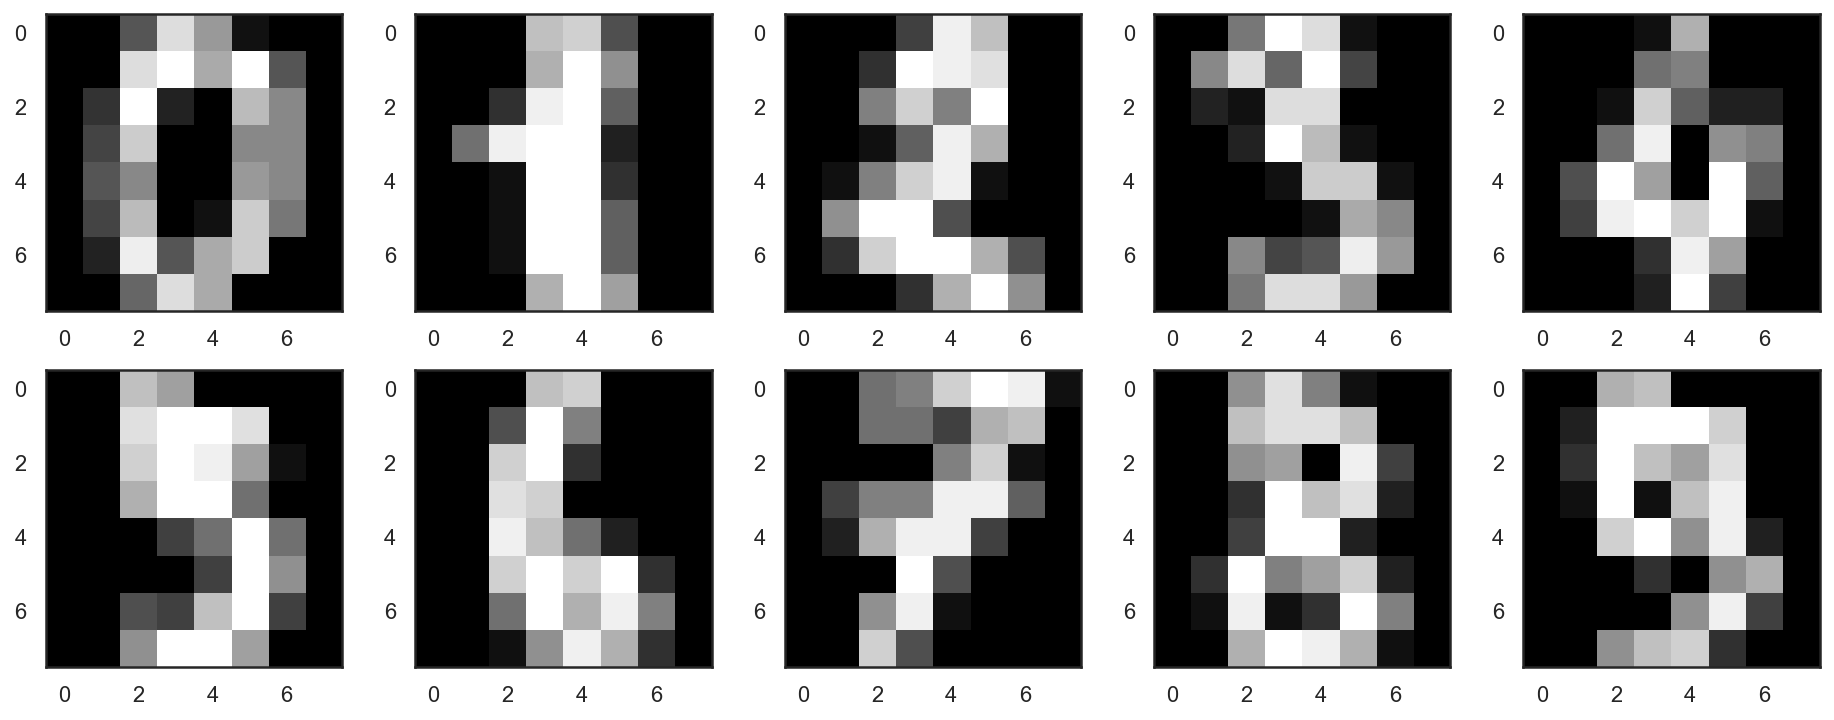

In [4]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

Виходить, розмірність простору ознак тут – 64. Але давайте знизимо розмірність всього до 2 і побачимо, що навіть на око рукописні цифри непогано поділяються на кластери.

Projecting 64-dimensional data to 2D


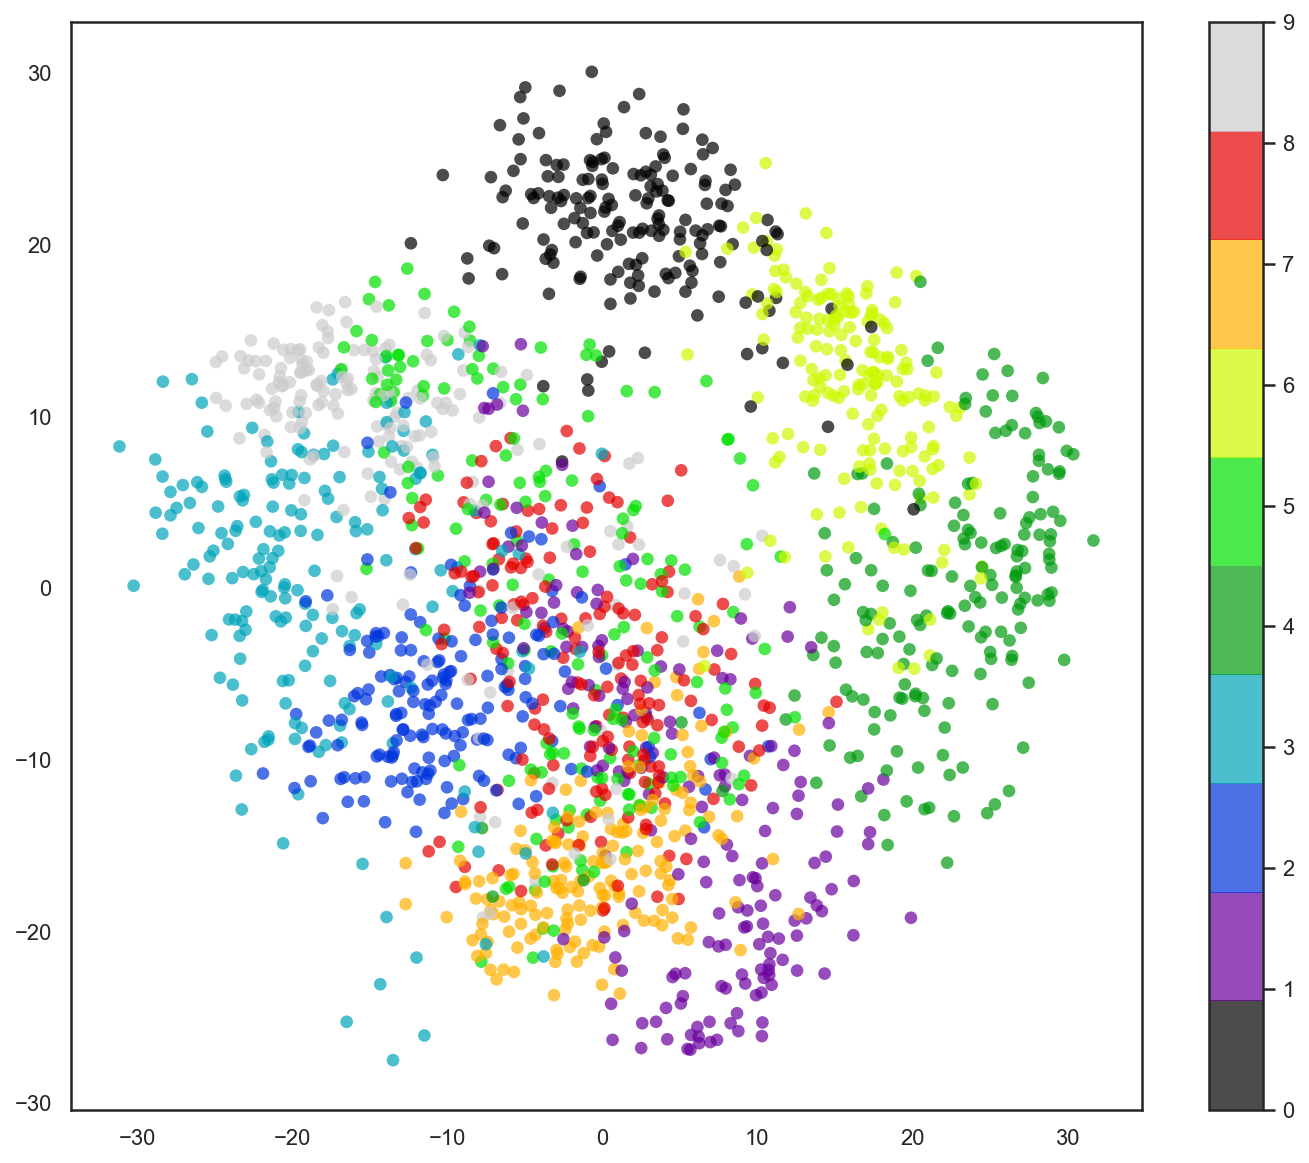

In [5]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Отриманий рисунок дозволяє побачити залежності між різними цифрами. Наприклад, цифри 0 і 6 розташовуються в сусідніх кластерах, що говорить про їх схоже написання. Найбільш "розкиданий" (по інших кластер) – це кластер, який відповідає цифрі 8, що говорить про те, що вона має багато різних написань, які роблять її схожою з багатьма іншими цифрами.

Подивимося, як виглядають перші дві головні компоненти.

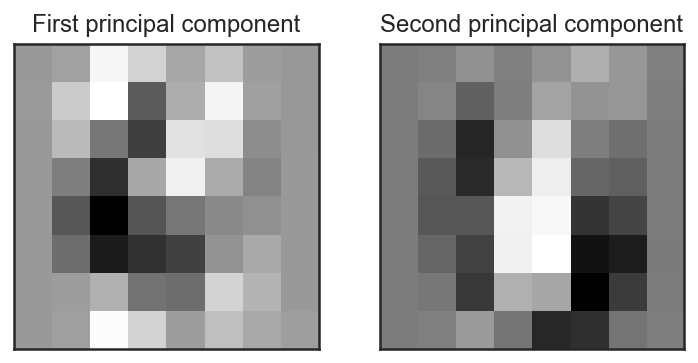

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

З t-SNE картинка виходить ще краща, оскільки у PCA обмеження – він знаходить лише лінійні комбінації вихідних ознак. Зате навіть на цьому відносно невеликому наборі даних можна помітити, наскільки t-SNE довше працює.

Wall time: 7.69 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

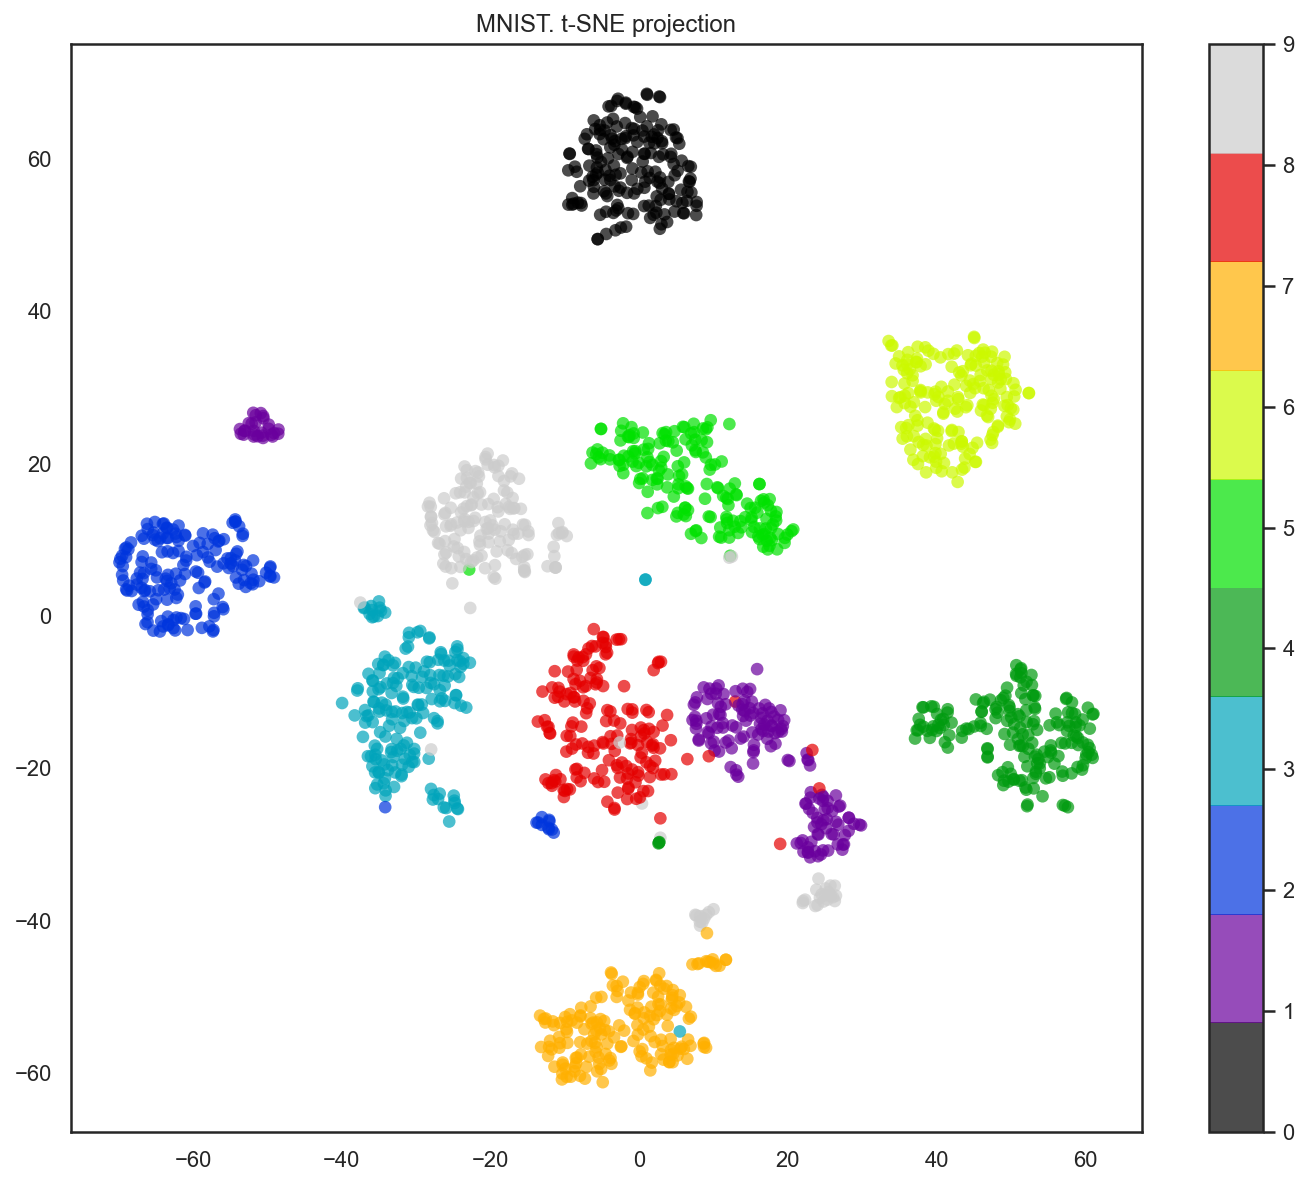

In [7]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

### Стиснення даних

Іншим застосуванням PCA є зниження розмірності даних для їх стиснення. Розглянемо, як впливає кількість відібраних головних компонент (на які здійснюється проекція) на якість відновлення вихідного зображення.

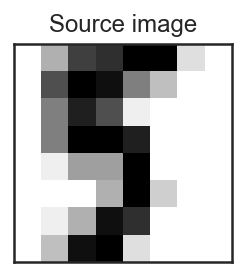

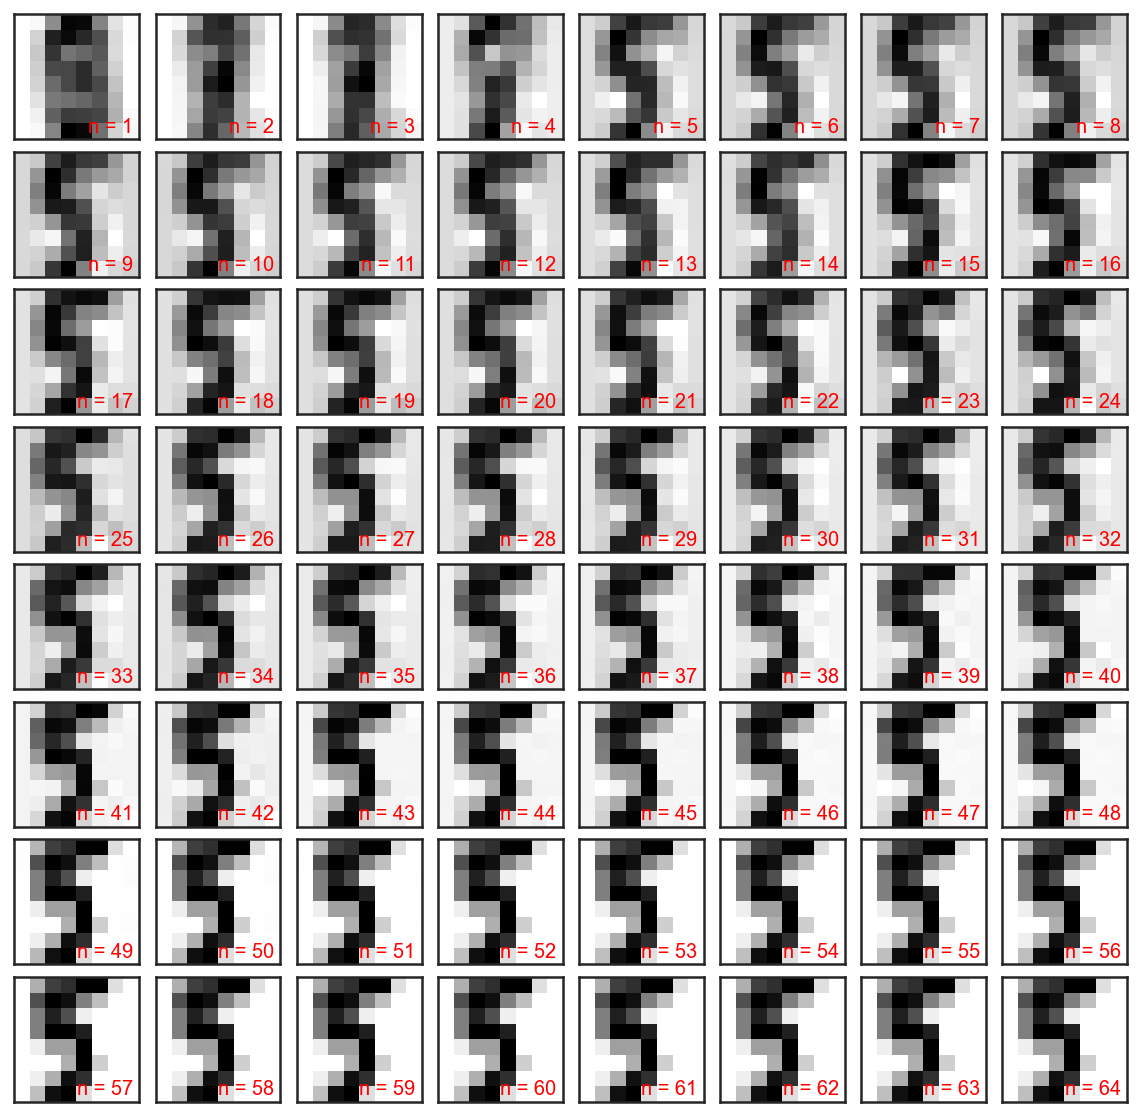

In [8]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Як зрозуміти, яку кількість головних компонент достатньо залишити? На практиці, як правило, вибирають стільки головних компонент, щоб залишити 90% дисперсії вихідних даних. В даному випадку для цього достатньо виділити 21 головну компоненту, тобто знизити розмірність з 64 ознак до 21.

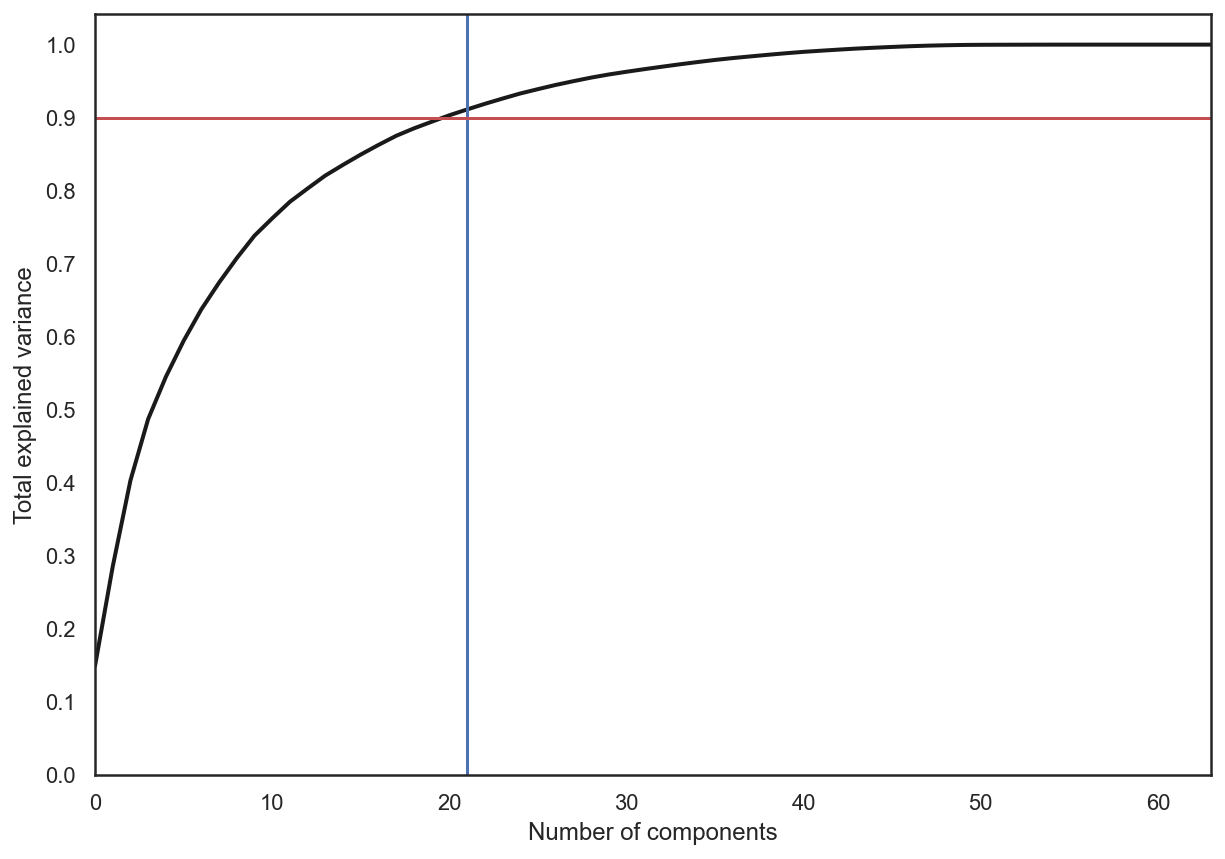

In [9]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [10]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


### Попередня обробка даних

Метод головних компонент часто використовується для попередньої обробки даних перед навчанням класифікатора. Як приклад такого застосування розглянемо задачу про розпізнавання облич.

Для початку подивимося на вихідні дані.

In [11]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)    

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
Wall time: 551 ms


Розподіл цільового класу:

In [12]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


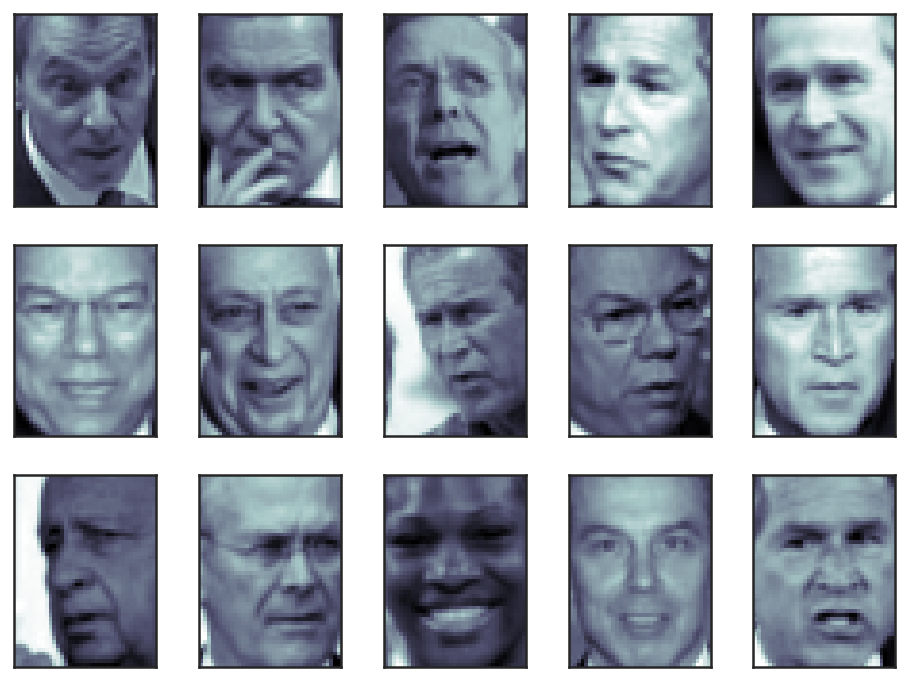

In [13]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [14]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Замість звичайного PCA скористаємося його наближеною версією (randomized PCA), яка дозволяє істотно прискорити роботу алгоритму на великих наборах даних. Виділимо 100 головних компонент. Як видно, вони пояснюють більш 90% дисперсії вихідних даних.

100 principal components explain 92.70% of variance


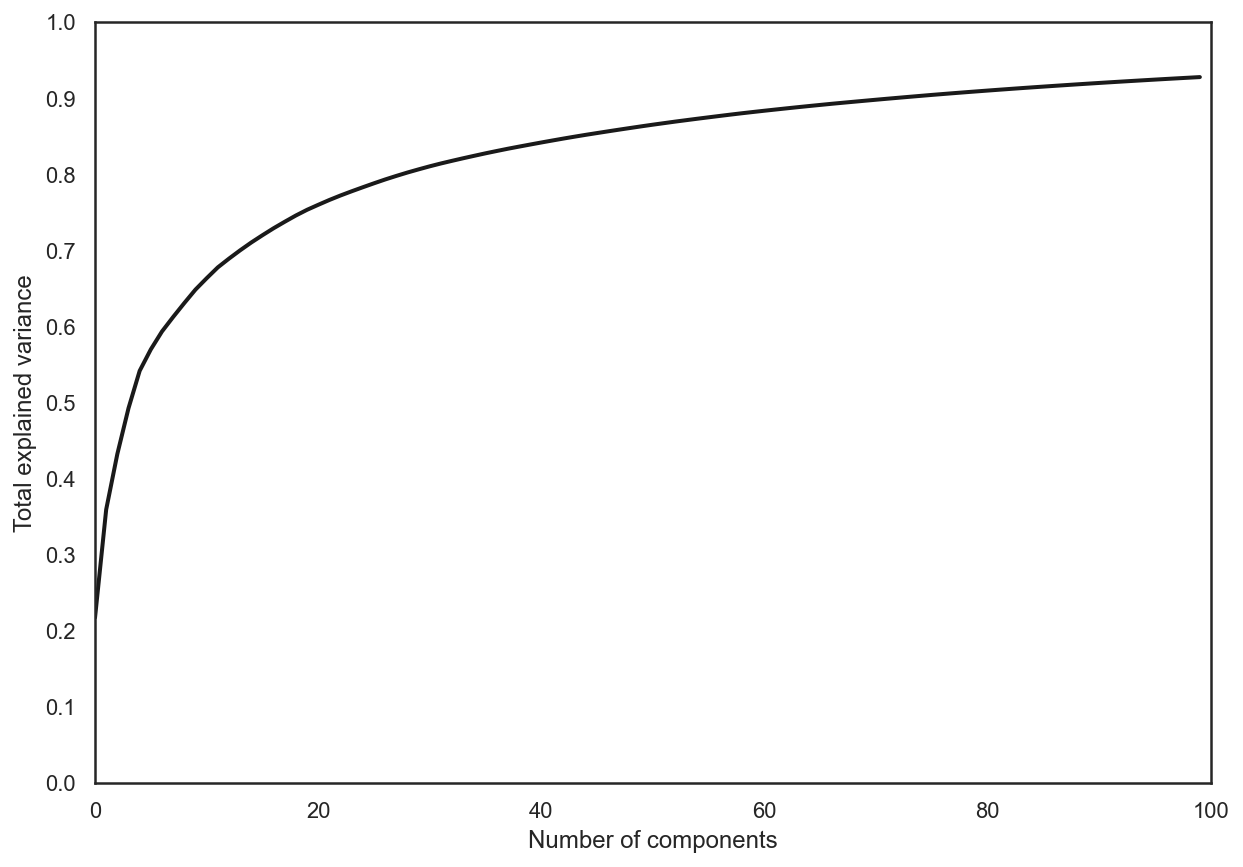

In [15]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Подивимося на головні компоненти (або головні "обличчя"). Бачимо, що перші головні компоненти несуть в собі інформацію в основному про освітлення на фотографії, в той час як решта виділяють якісь окремі риси людського обличчя – очі, брови і інші.

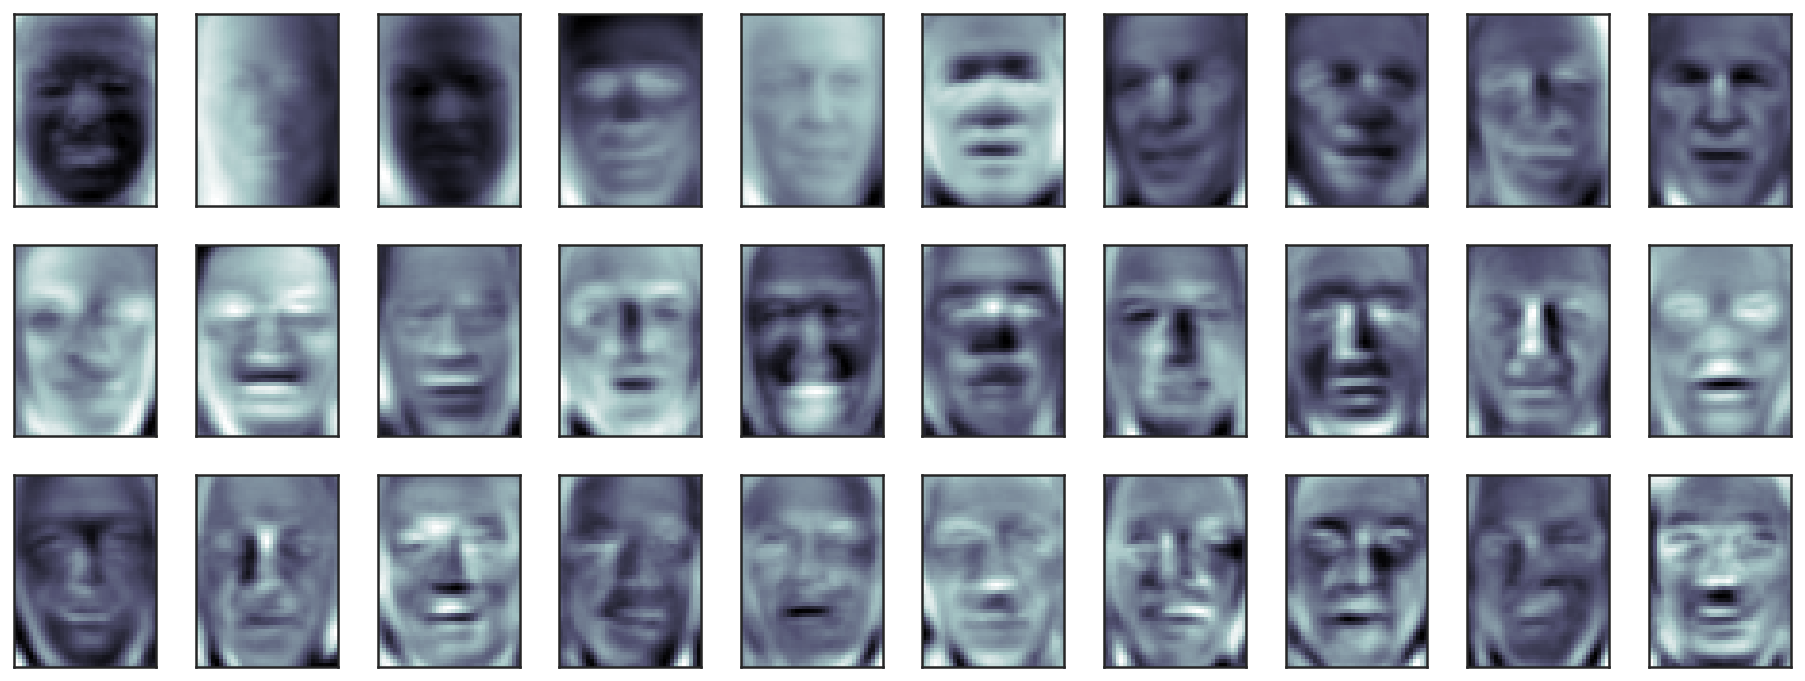

In [16]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

PCA дозволяє подивитися на "середнє" обличчя – тут обчислюється середнє по кожній новій ознаці.

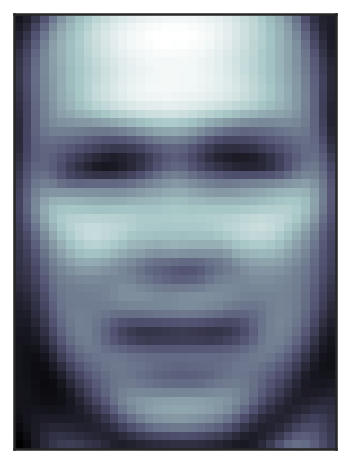

In [17]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Перейдемо тепер безпосередньо до класифікації. Ми скоротили розмірність даних (з 1850 ознак до 100), що дозволяє істотно прискорити роботу стандартних алгоритмів навчання. Налаштуємо модель логістичної регресії  і подивимося на результати класифікації.

In [18]:
%%time
from sklearn.linear_model import LogisticRegression

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Wall time: 19 ms


In [19]:
clf = LogisticRegression(multi_class='multinomial', 
                         random_state=17, solver='lbfgs', 
                         max_iter=50000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

Accuracy: 0.700000
                   precision    recall  f1-score   support

     Ariel Sharon       0.45      0.60      0.51        15
     Colin Powell       0.71      0.71      0.71        65
  Donald Rumsfeld       0.52      0.52      0.52        29
    George W Bush       0.84      0.81      0.83       133
Gerhard Schroeder       0.62      0.64      0.63        33
      Hugo Chavez       0.69      0.69      0.69        16
   Jacques Chirac       0.60      0.25      0.35        12
    Jean Chretien       0.40      0.40      0.40        10
    John Ashcroft       0.81      0.72      0.76        18
Junichiro Koizumi       0.65      1.00      0.79        11
  Serena Williams       0.69      0.58      0.63        19
       Tony Blair       0.62      0.72      0.67        29

         accuracy                           0.70       390
        macro avg       0.63      0.64      0.62       390
     weighted avg       0.71      0.70      0.70       390



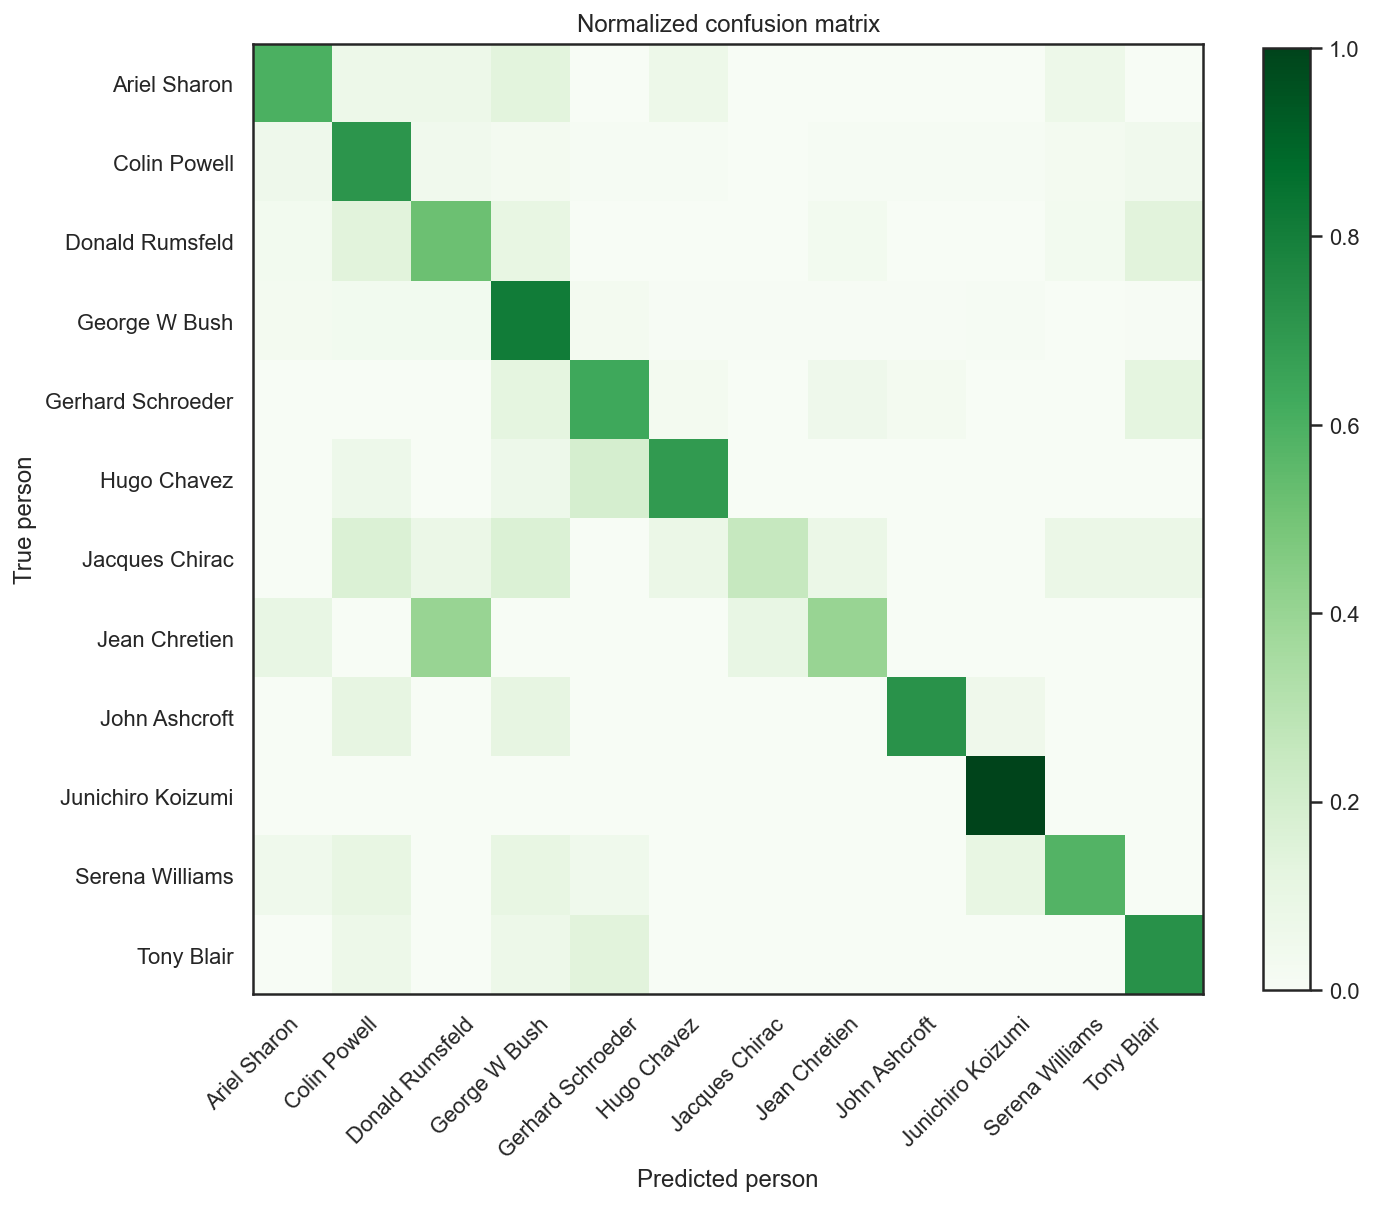

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

## 4. Корисні ресурси
- [Формальний опис PCA](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD](https://uk.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BA%D0%BB%D0%B0%D0%B4_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%96)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)